In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%store -r df

In [3]:
df.head()

,industry,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,NaN,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [4]:
df.sum()

industry    01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...
1993                                                    47136
1994                                                  17017.8
1995                                                  8263.11
1996                                                  13622.5
1997                                                  46830.7
1998                                                  35710.2
1999                                                  50166.8
2000                                                  69985.6
2001                                                  35130.3
2002                                                  30762.7
2003                                                  43050.8
2004                                                  18245.7
2005                                                   107434
2006                                                   105127
2007                                                   116098
2008    

In [5]:
df.dtypes

industry    object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
dtype: object

In [4]:
%store df

Stored 'df' (DataFrame)


In [5]:
df_melt = df.melt(['industry'])


In [6]:
df_sum_industry = df_melt.groupby('industry').sum().sort_values('value', ascending=False).reset_index()

In [7]:
df_sum_industry.head()

,industry,variable,value
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1993199419951996199719981999200020012002200320...,1548270.82
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1993199419951996199719981999200020012002200320...,1264269.25
2,68 ACTIVIDADES INMOBILIARIAS,1993199419951996199719981999200020012002200320...,1179823.47
3,41 CONSTRUCCIÓN DE EDIFICIOS,1993199419951996199719981999200020012002200320...,625453.52
4,42 INGENIERÍA CIVIL,1993199419951996199719981999200020012002200320...,505040.35


In [35]:
df_melt = df_melt.sort_values('value', ascending=False).reset_index()

In [36]:
df_melt.head()

,industry,variable,value
2059,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",2016,738824.63
1856,10 INDUSTRIA DE LA ALIMENTACIÓN,2014,550685.82
2323,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",2019,525444.62
1886,42 INGENIERÍA CIVIL,2014,501461.18
1731,68 ACTIVIDADES INMOBILIARIAS,2012,494640.58


In [13]:
df_melt = df_melt.dropna().reset_index(drop=True)


Text(0.5, 1.0, 'Evolución por sector de la inversión de empresas españolas en México')

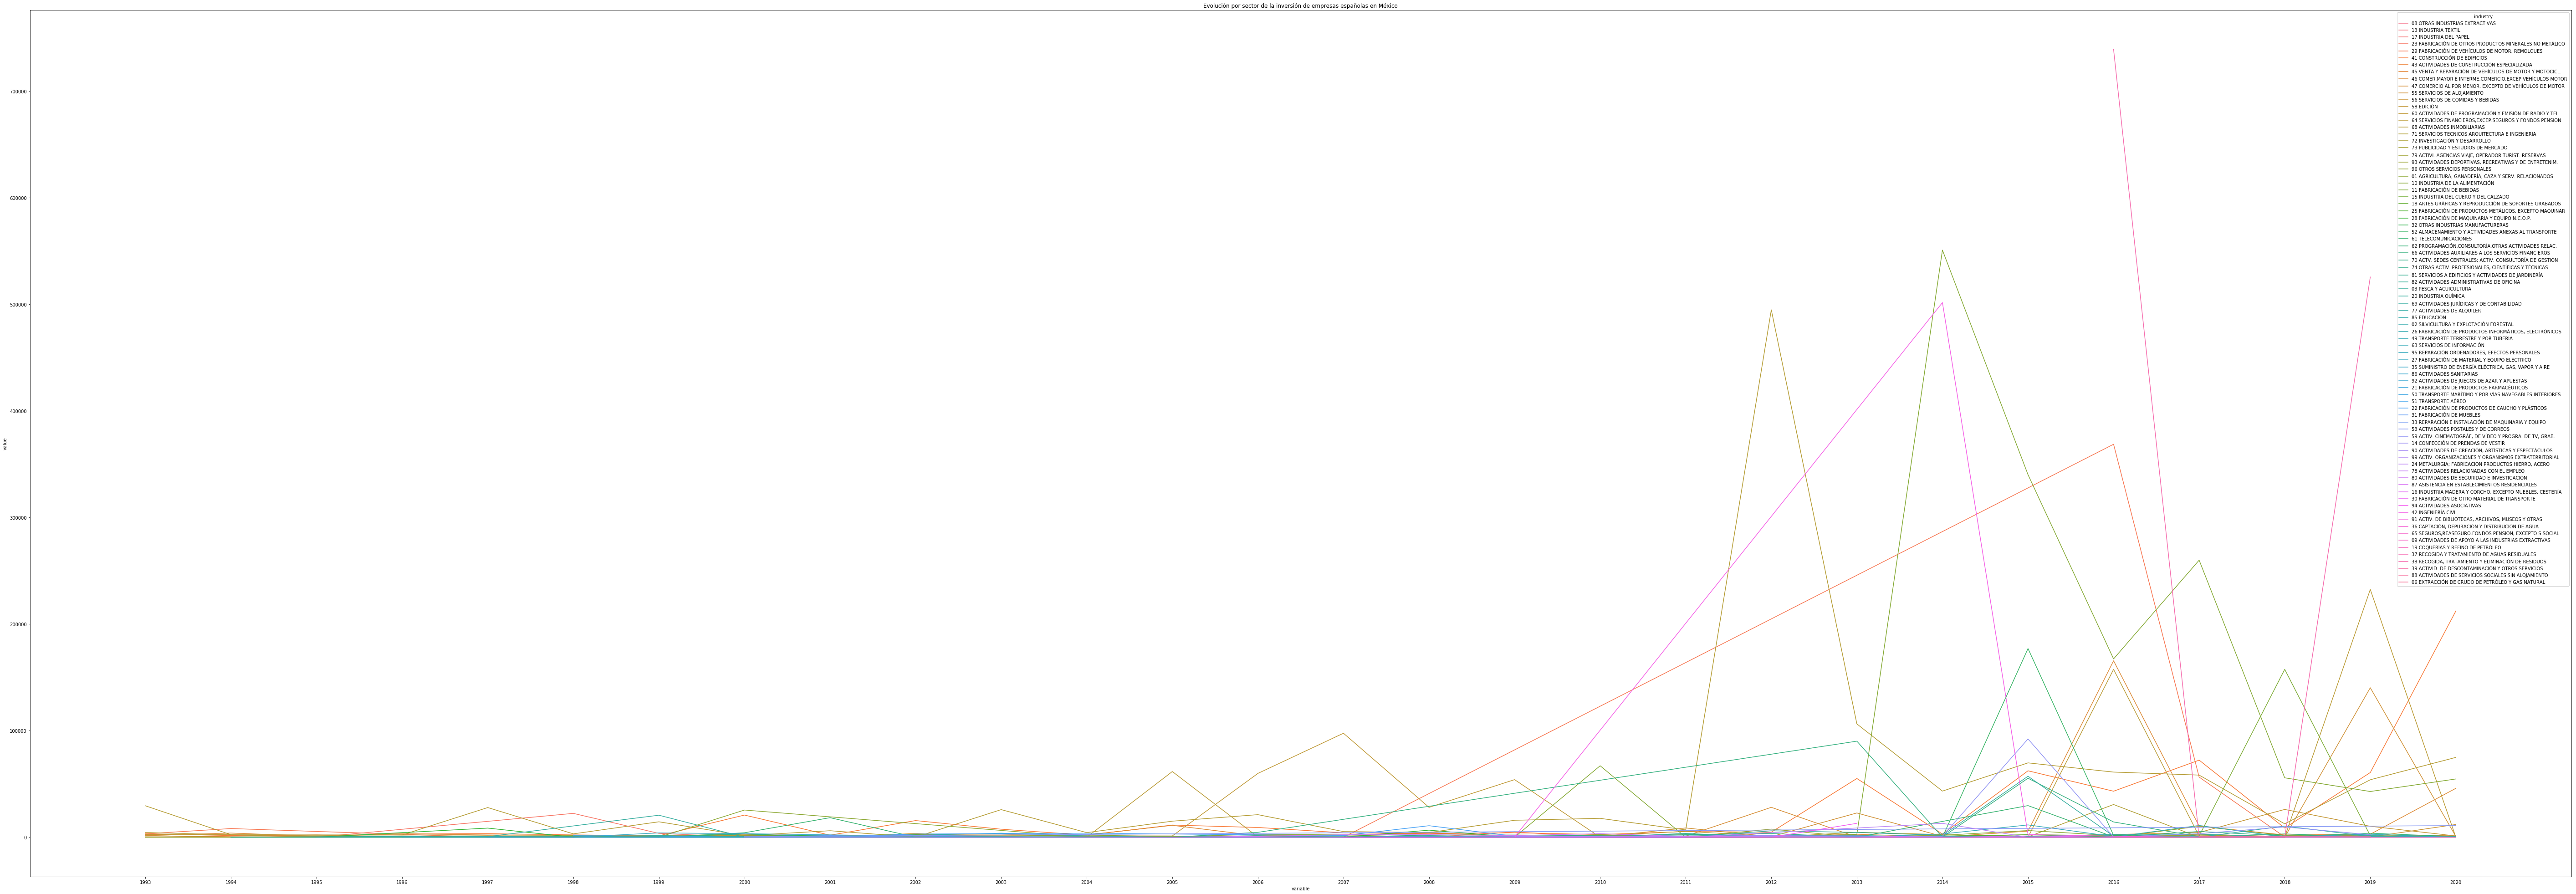

In [15]:
plt.figure(figsize=(100,35))
sns.lineplot(data=df_melt, x='variable', y='value', hue='industry')
plt.title('Evolución por sector de la inversión de empresas españolas en México')

In [23]:
df_melt['industry'].unique()

array(['08 OTRAS INDUSTRIAS EXTRACTIVAS', '13 INDUSTRIA TEXTIL',
       '17 INDUSTRIA DEL PAPEL',
       '23 FABRICACIÓN DE OTROS PRODUCTOS MINERALES NO METÁLICO',
       '29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES',
       '41 CONSTRUCCIÓN DE EDIFICIOS',
       '43 ACTIVIDADES DE CONSTRUCCIÓN ESPECIALIZADA',
       '45 VENTA Y REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICL.',
       '46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCULOS MOTOR',
       '47 COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE MOTOR',
       '55 SERVICIOS DE ALOJAMIENTO', '56 SERVICIOS DE COMIDAS Y BEBIDAS',
       '58 EDICIÓN',
       '60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RADIO Y TEL',
       '64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDOS PENSION',
       '68 ACTIVIDADES INMOBILIARIAS',
       '71 SERVICIOS TECNICOS ARQUITECTURA E INGENIERIA',
       '72 INVESTIGACIÓN Y DESARROLLO',
       '73 PUBLICIDAD Y ESTUDIOS DE MERCADO',
       '79 ACTIVI. AGENCIAS VIAJE, OPERADOR TURÍST. RESERVAS',
       '93 A

Text(0.5, 1.0, 'Volumen de la inversión por sector')

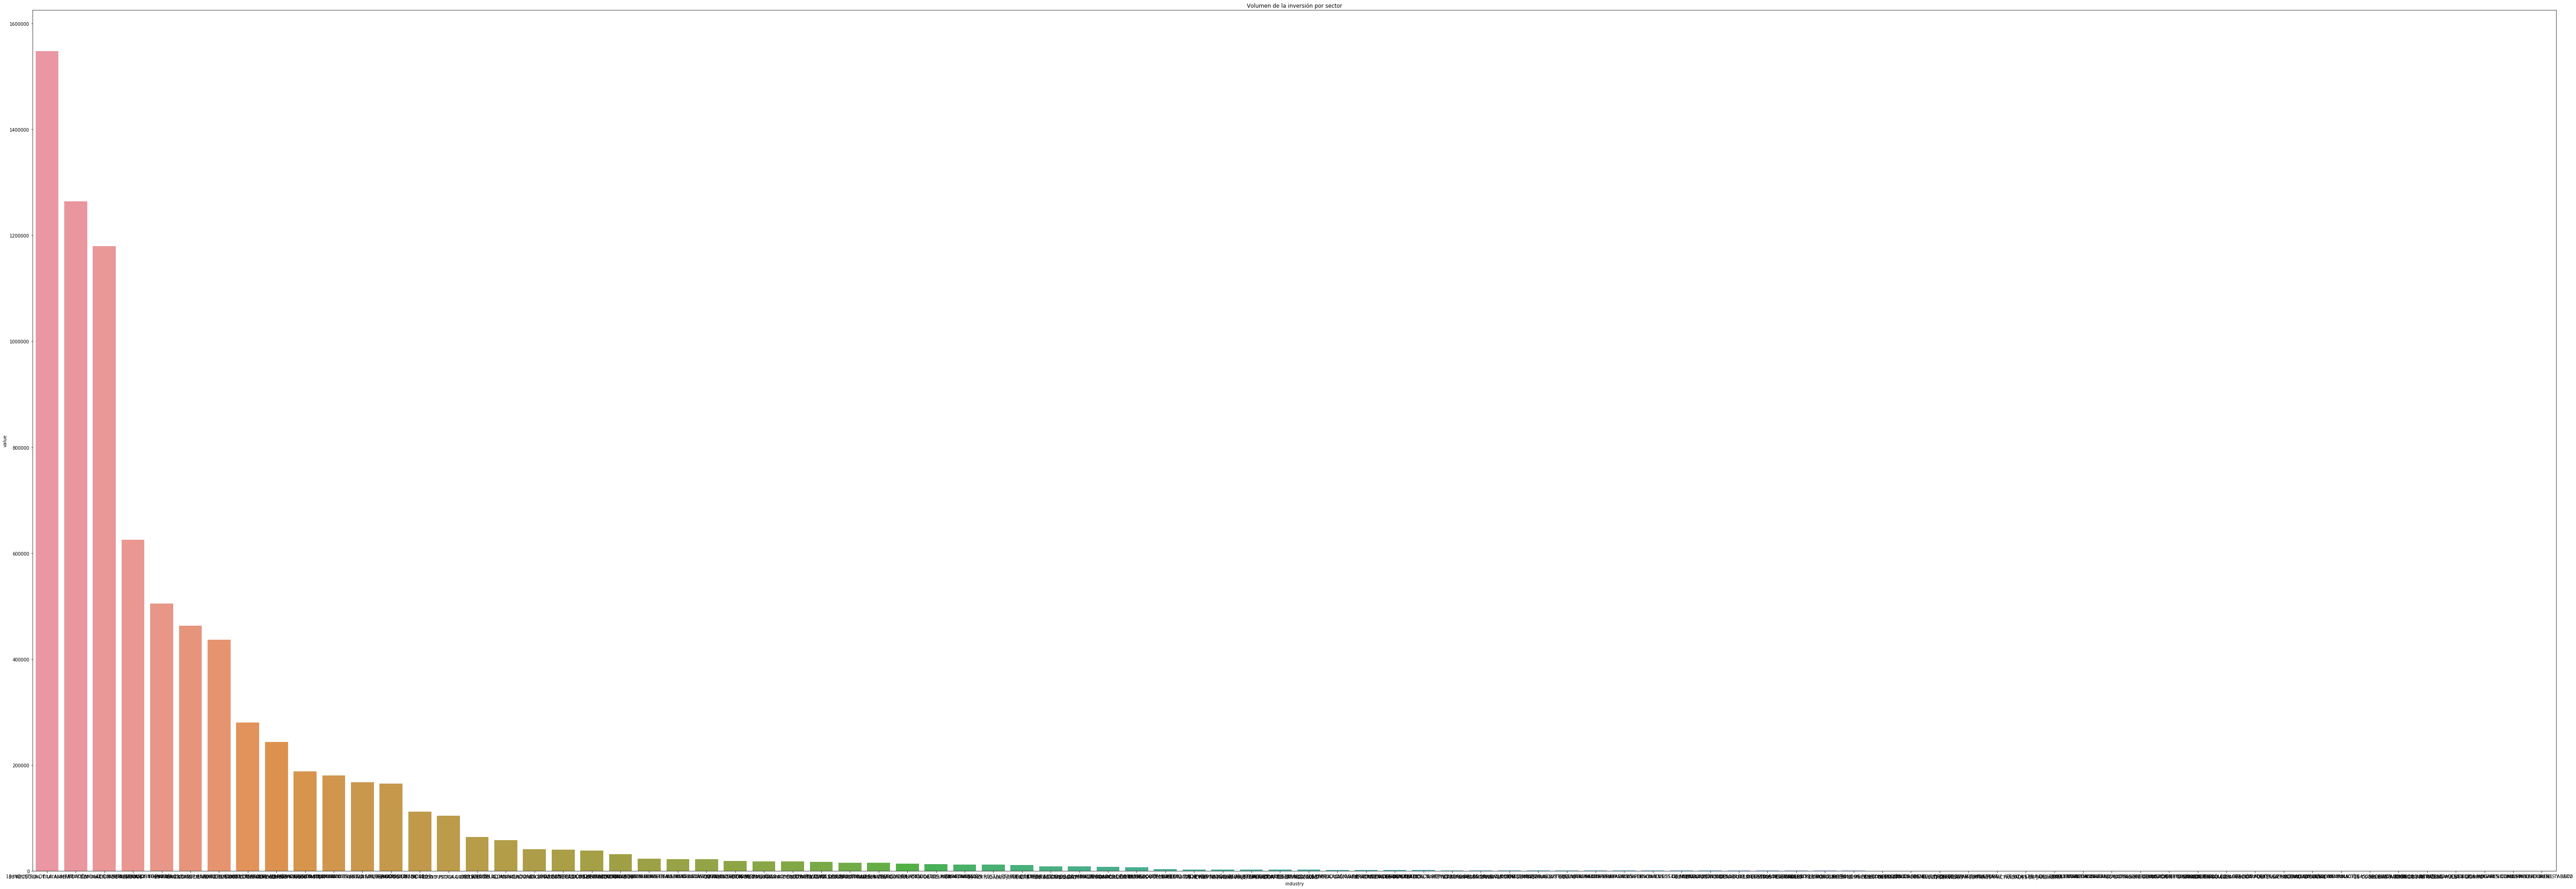

In [16]:
plt.figure(figsize=(100,35))
sns.barplot(data=df_sum_industry, x='industry', y='value')
plt.title('Volumen de la inversión por sector')

In [17]:
sum_investment = df_sum_industry['value'].sum()

for industry  in df_sum_industry:
    df_sum_industry['% total'] = df_sum_industry['value'] / sum_investment * 100

In [18]:
df_sum_industry.head(14)

,industry,value,% total
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82,19.291341
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25,15.752702
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47,14.700514
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52,7.793105
4,42 INGENIERÍA CIVIL,505040.35,6.292766
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76,5.770089
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72,5.439751
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32,3.493668
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54,3.027682
9,55 SERVICIOS DE ALOJAMIENTO,187957.56,2.341937


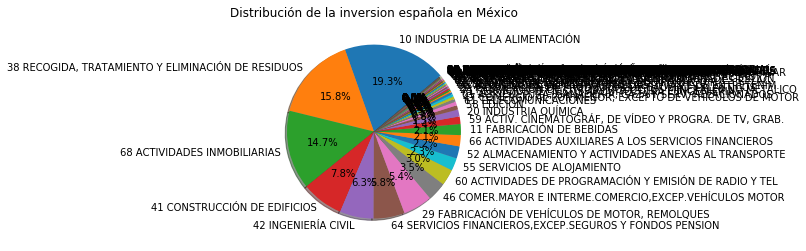

In [19]:
plt.pie(data=df_sum_industry, x='value', labels='industry', 
        autopct='%1.1f%%', shadow=True, startangle=40)
plt.title('Distribución de la inversion española en México')
plt.show()

In [59]:
new_header = df_t.iloc[0]
df_t.columns = new_header
df_t.head()

1993,nan,nan,nan,nan,nan,nan,235.6,nan,nan,nan,...,nan,nan,nan,1.8,nan,nan,88.35,nan,nan,nan
1993,NaN,NaN,NaN,NaN,NaN,NaN,235.6,NaN,NaN,NaN,...,NaN,NaN,NaN,1.8,NaN,NaN,88.35,NaN,NaN,NaN
1994,267.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,210.97,NaN,36.06,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,180.3,NaN,NaN,NaN,NaN,NaN,NaN
1996,120.2,0.12,NaN,NaN,NaN,NaN,0,NaN,7.21,NaN,...,NaN,NaN,NaN,NaN,NaN,248.71,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,...,NaN,NaN,2.4,1.5,NaN,141.09,NaN,NaN,NaN,NaN


In [20]:
df_t

NameError: name 'df_t' is not defined

In [11]:
df_t = df_t.drop(['industry'], axis=0)

In [12]:
df_t.head()

industry,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,03 PESCA Y ACUICULTURA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,07 EXTRACCIÓN DE MINERALES METÁLICOS,08 OTRAS INDUSTRIAS EXTRACTIVAS,09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,10 INDUSTRIA DE LA ALIMENTACIÓN,11 FABRICACIÓN DE BEBIDAS,...,"90 ACTIVIDADES DE CREACIÓN, ARTÍSTICAS Y ESPECTÁCULOS","91 ACTIV. DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y OTRAS",92 ACTIVIDADES DE JUEGOS DE AZAR Y APUESTAS,"93 ACTIVIDADES DEPORTIVAS, RECREATIVAS Y DE ENTRETENIM.",94 ACTIVIDADES ASOCIATIVAS,"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",96 OTROS SERVICIOS PERSONALES,97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIAL
1993,NaN,NaN,NaN,NaN,NaN,NaN,235.6,NaN,NaN,NaN,...,NaN,NaN,NaN,1.8,NaN,NaN,88.35,NaN,NaN,NaN
1994,267.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,210.97,NaN,36.06,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,180.3,NaN,NaN,NaN,NaN,NaN,NaN
1996,120.2,0.12,NaN,NaN,NaN,NaN,0,NaN,7.21,NaN,...,NaN,NaN,NaN,NaN,NaN,248.71,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,...,NaN,NaN,2.4,1.5,NaN,141.09,NaN,NaN,NaN,NaN


In [13]:
df_t.dtypes

industry
01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS       object
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL                     object
03 PESCA Y ACUICULTURA                                     object
05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO                object
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL           object
07 EXTRACCIÓN DE MINERALES METÁLICOS                       object
08 OTRAS INDUSTRIAS EXTRACTIVAS                            object
09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS       object
10 INDUSTRIA DE LA ALIMENTACIÓN                            object
11 FABRICACIÓN DE BEBIDAS                                  object
12 INDUSTRIA DEL TABACO                                    object
13 INDUSTRIA TEXTIL                                        object
14 CONFECCIÓN DE PRENDAS DE VESTIR                         object
15 INDUSTRIA DEL CUERO Y DEL CALZADO                       object
16 INDUSTRIA MADERA Y CORCHO, EXCEPTO MUEBLES, CESTERÍA    object
1

In [12]:
df.describe()

industry,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,03 PESCA Y ACUICULTURA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,07 EXTRACCIÓN DE MINERALES METÁLICOS,08 OTRAS INDUSTRIAS EXTRACTIVAS,09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,10 INDUSTRIA DE LA ALIMENTACIÓN,11 FABRICACIÓN DE BEBIDAS,...,"90 ACTIVIDADES DE CREACIÓN, ARTÍSTICAS Y ESPECTÁCULOS","91 ACTIV. DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y OTRAS",92 ACTIVIDADES DE JUEGOS DE AZAR Y APUESTAS,"93 ACTIVIDADES DEPORTIVAS, RECREATIVAS Y DE ENTRETENIM.",94 ACTIVIDADES ASOCIATIVAS,"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",96 OTROS SERVICIOS PERSONALES,97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIAL
count,21.00,3,3.0,1,2,1,16.0,2,23.0,18.0,...,10.0,2.0,8.0,21.0,8.0,4.00,15.0,1,1,3.0
unique,20.00,3,3.0,1,2,1,4.0,2,21.0,16.0,...,10.0,2.0,6.0,21.0,4.0,4.00,15.0,1,1,3.0
top,1.51,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,3.0,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,07 EXTRACCIÓN DE MINERALES METÁLICOS,0.0,09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRA...,0.0,0.0,...,1.8,0.0,0.0,3.0,0.0,141.09,30.0,97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,4.0
freq,2.00,1,1.0,1,1,1,13.0,1,3.0,3.0,...,1.0,1.0,3.0,1.0,5.0,1.00,1.0,1,1,1.0


TypeError: 'NoneType' object is not iterable

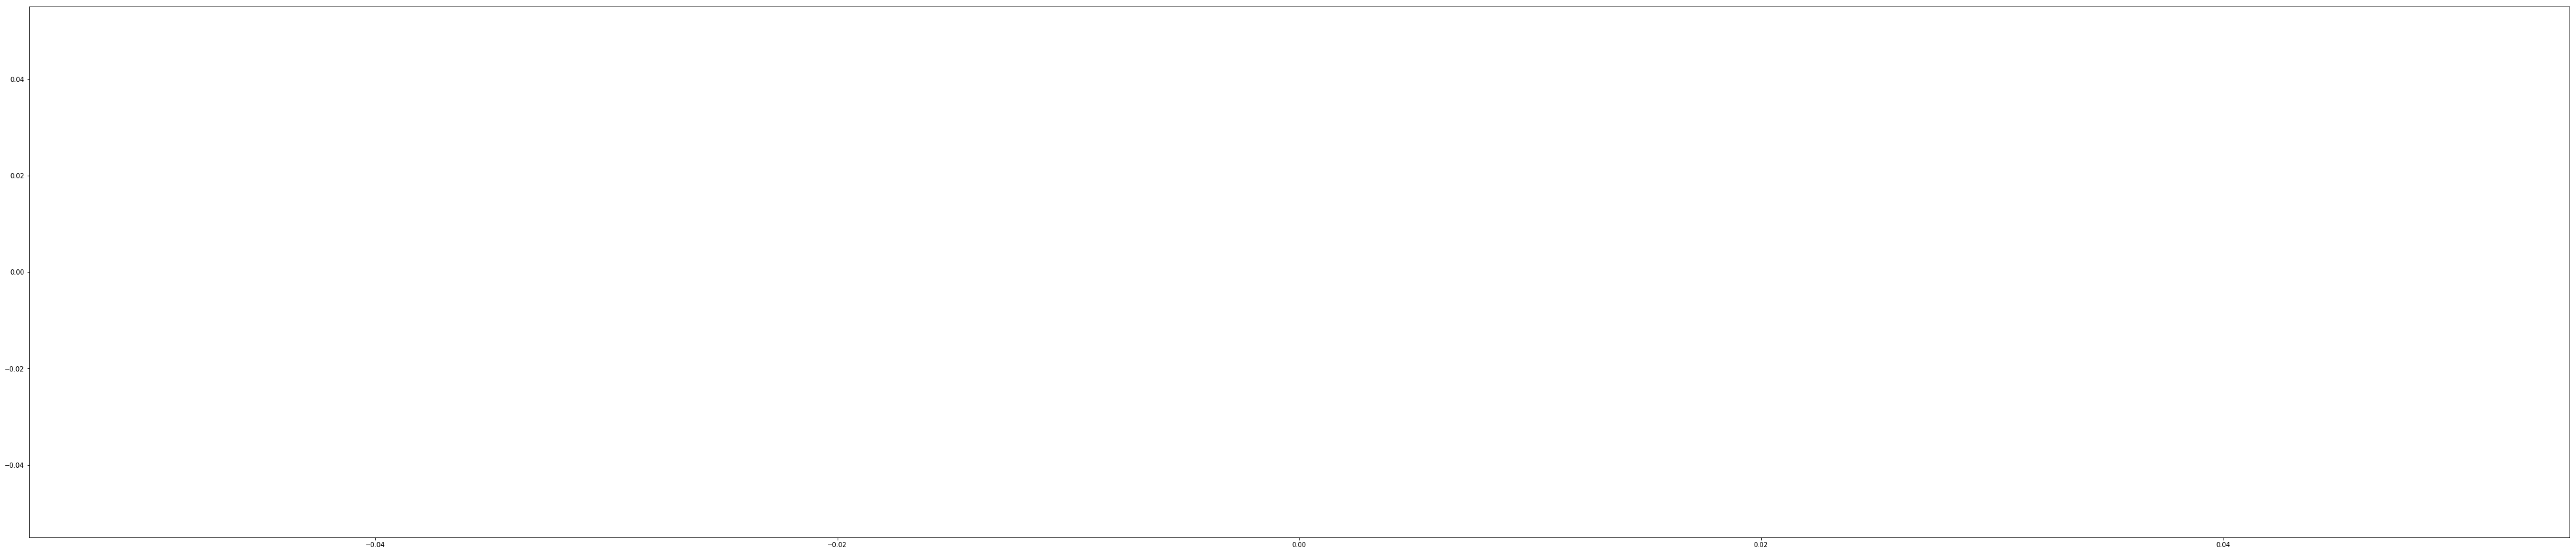

In [38]:
plt.figure(figsize=(70,15))
sns.lineplot(data=df)


In [25]:
%store -r df_mex

In [26]:
df_mex

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),47.13597,17.01775,8.26311,13.6225,46.83067,35.71018,50.16676,69.98563,35.13027,30.76274,...,43.89013,554.69317,309.42142,1123.31543,921.64333,1763.92089,504.2553,295.1731,1091.25539,418.33616


In [33]:
df_mex_2 = df_mex.transpose()
df_mex_2.head()

Variables,Inversion Es(millones€)
1993,47.13597
1994,17.01775
1995,8.26311
1996,13.62250
1997,46.83067


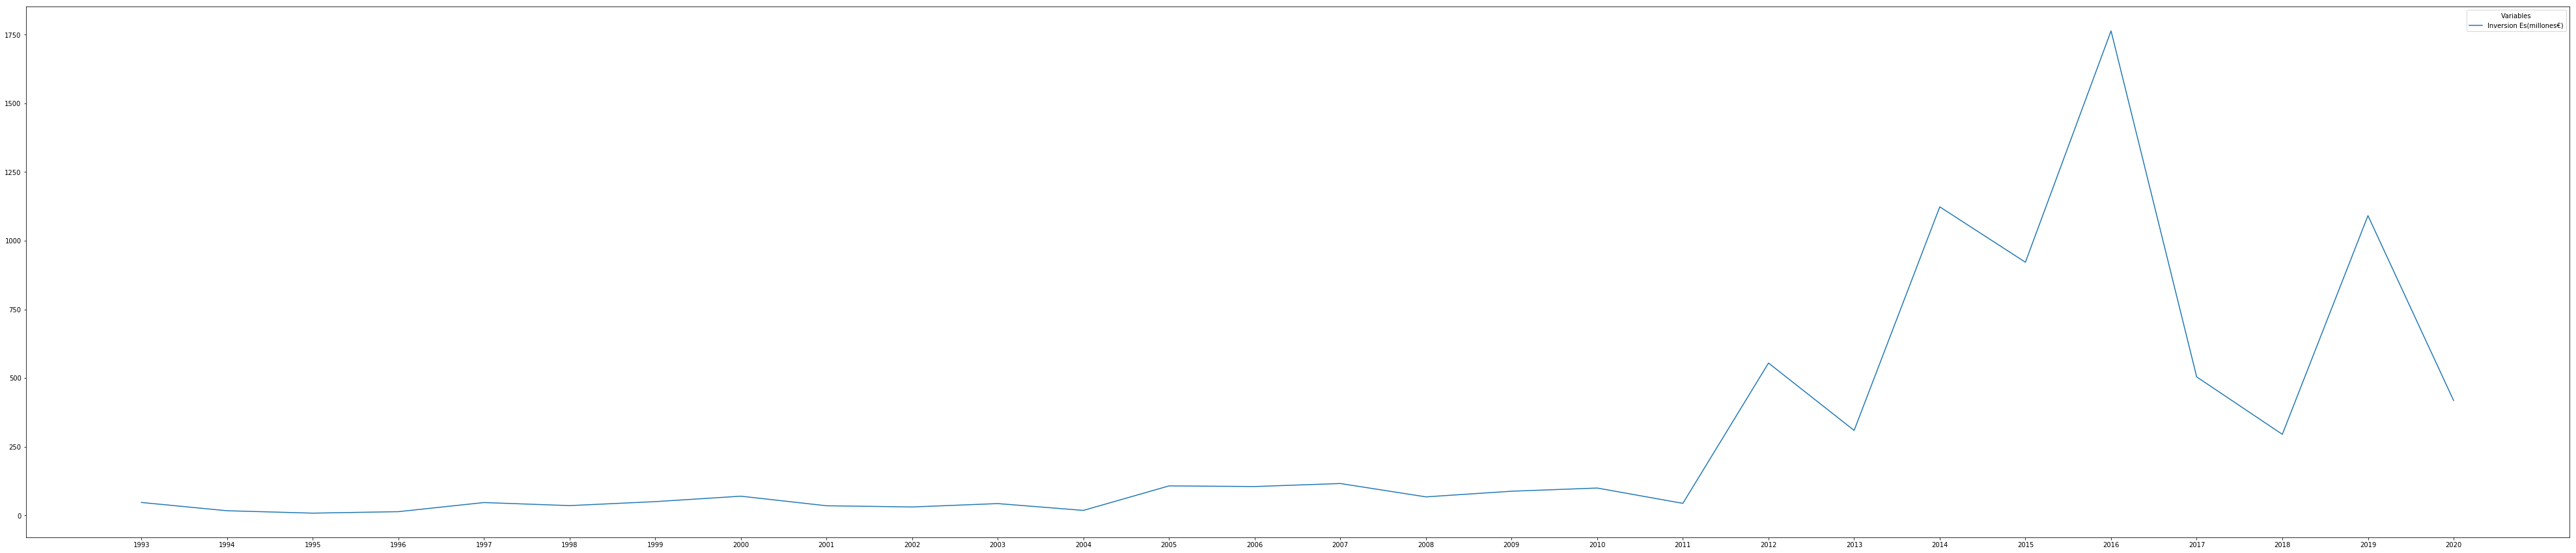

In [34]:
plt.figure(figsize=(70,15))
sns.lineplot(data=df_mex_2)

In [36]:
df_max = df_mex_2['Inversion Es(millones€)'].max()
df_mex_2.loc[df_mex_2['Inversion Es(millones€)'] == df_max]

Variables,Inversion Es(millones€)
2016,1763.92089


In [102]:
df_2016 = df.iloc[df.index.get_loc('2016')].reset_index()


In [103]:
df_2016.head()

,industry,2016
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",1503.5
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0
2,03 PESCA Y ACUICULTURA,NaN
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN


In [104]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
industry    88 non-null object
2016        59 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [105]:
df_2016 = df_2016.dropna()

In [106]:
df_2016.head()

,industry,2016
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",1503.5
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0
6,08 OTRAS INDUSTRIAS EXTRACTIVAS,0
8,10 INDUSTRIA DE LA ALIMENTACIÓN,167272
9,11 FABRICACIÓN DE BEBIDAS,1400.48


In [107]:
df_2016.columns

Index(['industry', '2016'], dtype='object')

In [108]:
df_2016.dtypes

industry    object
2016        object
dtype: object

In [109]:
df_2016['2016'] = df_2016['2016'].astype(float)

In [110]:
df_2016.dtypes

industry     object
2016        float64
dtype: object

In [111]:
df_2016.reset_index(drop=True)

,industry,2016
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",1503.50
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.00
2,08 OTRAS INDUSTRIAS EXTRACTIVAS,0.00
3,10 INDUSTRIA DE LA ALIMENTACIÓN,167271.79
4,11 FABRICACIÓN DE BEBIDAS,1400.48
5,13 INDUSTRIA TEXTIL,8.59
6,"16 INDUSTRIA MADERA Y CORCHO, EXCEPTO MUEBLES,...",0.00
7,19 COQUERÍAS Y REFINO DE PETRÓLEO,0.00
8,20 INDUSTRIA QUÍMICA,1053.24
9,22 FABRICACIÓN DE PRODUCTOS DE CAUCHO Y PLÁSTICOS,0.40


In [116]:
df_2016.sort_values('2016', ascending=False).reset_index(drop=True)

,industry,2016
0,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",738824.63
1,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",368568.12
2,10 INDUSTRIA DE LA ALIMENTACIÓN,167271.79
3,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",165488.33
4,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",157431.49
5,68 ACTIVIDADES INMOBILIARIAS,61087.32
6,41 CONSTRUCCIÓN DE EDIFICIOS,43156.21
7,71 SERVICIOS TECNICOS ARQUITECTURA E INGENIERIA,30686.62
8,66 ACTIVIDADES AUXILIARES A LOS SERVICIOS FINA...,14315.49
9,82 ACTIVIDADES ADMINISTRATIVAS DE OFICINA,2598.62
